In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy

# Loading the dataset

In [2]:
abaloneDF = pd.DataFrame(pd.read_csv('./Weights/abalone.csv', header=None))
abaloneDF.columns = ['sex', 'length', 'diameter', 'height', 'whole weight', 'shucked weight', 'viscera weight', 'shell weight', 'rings']
print(abaloneDF.shape)
abaloneDF.head()

(4177, 9)


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Preprocessing the dataset

In [3]:
# counting the unique values in the sex column
np.unique(abaloneDF['sex'])

array(['F', 'I', 'M'], dtype=object)

## Encoding the categorical data in the sex column to numerical data

In [4]:
def encode(sex):
    if sex == 'M':
        return 2
    elif sex == 'F':
        return 1
    return 0

In [5]:
abaloneDF['sex'] = abaloneDF['sex'].apply(encode)

In [6]:
abaloneDF.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Getting basic details of the dataset

In [7]:
abaloneDF.describe()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.044530,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Dividing dataset in test and train samples

In [8]:
abaloneDF = abaloneDF.sample(frac=1.0).reset_index(drop=True)
abaloneDF.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0.510,0.400,0.125,0.5575,0.2615,0.1195,0.1525,9
1,0,0.445,0.335,0.100,0.4895,0.2745,0.0860,0.1105,7
2,1,0.695,0.525,0.205,1.8185,0.8190,0.4025,0.4525,13
3,2,0.470,0.370,0.105,0.4665,0.2025,0.1015,0.1550,10
4,1,0.465,0.350,0.130,0.4940,0.1945,0.1030,0.1550,18


In [9]:
trainSize = int(0.8 * len(abaloneDF))
trainData = abaloneDF[:trainSize].values
testData = abaloneDF[trainSize:].values

In [10]:
print(trainData.shape, testData.shape)

(3341, 9) (836, 9)


In [11]:
X_train = trainData[:, :8]
y_train = trainData[:, 8]
X_test = testData[:, :8]
y_test = testData[:, 8]

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3341, 8) (3341,) (836, 8) (836,)


In [13]:
X_train

array([[0.    , 0.51  , 0.4   , ..., 0.2615, 0.1195, 0.1525],
       [0.    , 0.445 , 0.335 , ..., 0.2745, 0.086 , 0.1105],
       [1.    , 0.695 , 0.525 , ..., 0.819 , 0.4025, 0.4525],
       ...,
       [1.    , 0.405 , 0.325 , ..., 0.151 , 0.063 , 0.117 ],
       [1.    , 0.605 , 0.47  , ..., 0.5405, 0.2215, 0.275 ],
       [2.    , 0.495 , 0.4   , ..., 0.2015, 0.18  , 0.25  ]])

## Normalize the training data (each feature should have 0 mean and 1 standard deviation)

In [14]:
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

In [15]:
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [16]:
# adding a column of 1's in the start of the training and test datas to denote X0
trainOnes = np.ones((trainData.shape[0], 1))
testOnes = np.ones((testData.shape[0], 1))
print(trainOnes.shape, testOnes.shape)
X_train = np.hstack((trainOnes, X_train))
X_test = np.hstack((testOnes, X_test))
print(X_train.shape, X_test.shape)


(3341, 1) (836, 1)
(3341, 9) (836, 9)


In [17]:
print(np.mean(X_train, axis=0))
print(np.std(X_train, axis=0))

[ 1.00000000e+00  1.40364623e-16  1.30794308e-16  5.31684178e-17
 -2.27560828e-16  1.01019994e-16  1.75455779e-16  1.86089462e-16
  3.29644190e-17]
[0. 1. 1. 1. 1. 1. 1. 1. 1.]


# Linear Regression

## Writing the necessary functions

In [18]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [19]:
def error(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    err = np.sum((y_ - y)**2)
    return err / m

In [20]:
def gradient(X, y, theta):
    m = X.shape[0]
    y_ = hypothesis(X, theta)
    grad = np.dot(X.T, (y_ - y))
    return grad/m

In [21]:
def gradientDescent(X, y, learningRate=0.01, maxEpochs=1000):
    m, n = X.shape
    theta = np.zeros((n,))
    errorList = []
    for i in tqdm(range(maxEpochs)):
        err = error(X, y, theta)
        errorList.append(err)
        grad = gradient(X, y, theta)
        theta = theta - learningRate * grad
    return theta, errorList

## Performing Regression

In [22]:
theta, errorList = gradientDescent(X_train, y_train)

100%|██████████| 1000/1000 [00:00<00:00, 6944.29it/s]


In [23]:
theta

array([ 9.87206706,  0.34876951,  0.34717279,  0.66690702,  0.60166668,
        0.25063328, -1.8289601 , -0.22741935,  1.9649004 ])

In [24]:
plt.style.use('seaborn')

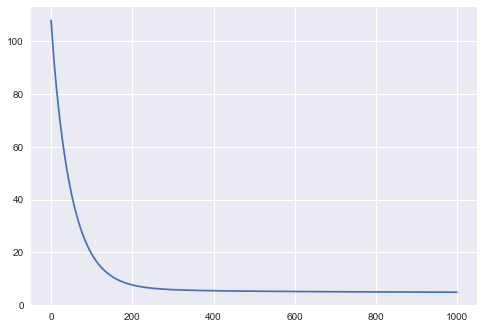

In [25]:
plt.plot(errorList)
plt.show()

## Predictions

In [26]:
def getPredictionList(X, theta):
    y_ = []
    for i in tqdm(range(X.shape[0])):
        pred = hypothesis(X[i], theta)
        y_.append(pred)
    y_ = np.array(y_)
    return y_

In [27]:
def rmse(X, y, theta):
    y_ = getPredictionList(X, theta)
    return np.sqrt(np.mean((y_ - y)**2).mean())

In [28]:
print("RMSE on training data: " + str(rmse(X_train, y_train, theta)))
print("RMSE on test data: " + str(rmse(X_test, y_test, theta)))

100%|██████████| 836/836 [00:00<00:00, 109535.12it/s]

RMSE on training data: 2.229958076191039
RMSE on test data: 2.4198582426597093


# Ridge Regression

## Plotting Graph

In [29]:
from sklearn.linear_model import Ridge

In [30]:
def ridgeRMSE(y, y_):
    return np.sqrt(np.mean((y_ - y)**2).mean())

In [31]:
alphaList = []
rmseList = []
alpha = 0.001
minRMSE = np.inf
minAlpha = 0
minTheta = []
for i in tqdm(range(10000)):
    ridgeModel = Ridge(alpha=alpha, fit_intercept=True, normalize=False, copy_X=True)
    ridgeModel.fit(X_train, y_train)
    y_ = ridgeModel.predict(X_test)
    currRMSE = ridgeRMSE(y_test, y_)
    alphaList.append(alpha)
    rmseList.append(currRMSE)
    if currRMSE < minRMSE:
        minRMSE = currRMSE
        minAlpha = alpha
        minTheta = ridgeModel.coef_
    alpha += 0.001
print("Minimum RMSE: " + str(minRMSE) + " for alpha: " + str(minAlpha) + " and optimum parameters: " + str(minTheta))

100%|██████████| 10000/10000 [00:11<00:00, 863.60it/s]

Minimum RMSE: 2.3730599062891073 for alpha: 3.5369999999997215 and optimum parameters: [ 0.          0.32732129  0.05020285  1.06722943  0.4318418   3.90186833
 -4.28417672 -0.953181    1.44218667]


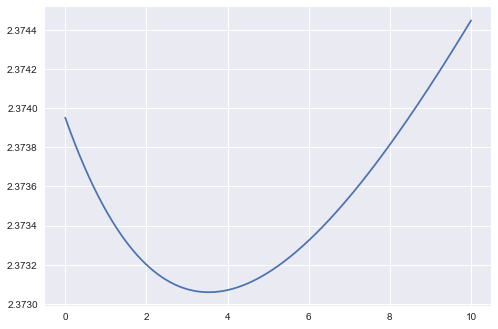

In [32]:
plt.plot(alphaList, rmseList)
plt.show()

## Using GridSearchCV to find the best model

In [33]:
from sklearn.model_selection import GridSearchCV

In [49]:
alphas = np.linspace(0.1, 5, 500)

In [50]:
ridgeGridModel = Ridge(fit_intercept=True, normalize=False, copy_X=True)

In [51]:
ridgeGrid = GridSearchCV(estimator=ridgeGridModel, param_grid={'alpha': alphas})

In [52]:
ridgeGrid.fit(X_train, y_train)
print(ridgeGrid.best_params_)

{'alpha': 1.8871743486973949}


In [53]:
print(ridgeGrid.best_params_)

{'alpha': 1.8871743486973949}


# Lasso Regression

In [48]:
from sklearn.linear_model import Lasso

In [54]:
def lassoRMSE(y, y_):
    return np.sqrt(np.mean((y_ - y)**2).mean())

In [69]:
alphaList = []
rmseList = []
alpha = 0.00001
minRMSE = np.inf
minAlpha = 0
minTheta = []
for i in tqdm(range(1000)):
    lassoModel = Lasso(alpha=alpha, fit_intercept=True,
                       normalize=False, copy_X=True)
    lassoModel.fit(X_train, y_train)
    y_ = lassoModel.predict(X_test)
    currRMSE = lassoRMSE(y_test, y_)
    alphaList.append(alpha)
    rmseList.append(currRMSE)
    if currRMSE < minRMSE:
        minRMSE = currRMSE
        minAlpha = alpha
        minTheta = lassoModel.coef_
    alpha += 0.00005
print("Minimum RMSE: " + str(minRMSE) + " for alpha: " +
      str(minAlpha) + " and optimum parameters: " + str(minTheta))


100%|██████████| 1000/1000 [00:35<00:00, 28.13it/s]

Minimum RMSE: 2.3731018525930767 for alpha: 0.003310000000000002 and optimum parameters: [ 0.          0.3229043   0.          1.10385498  0.42638251  4.05840759
 -4.36590913 -0.94561094  1.37428667]


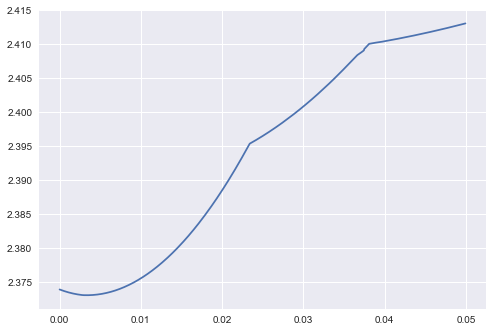

In [70]:
plt.plot(alphaList, rmseList)
plt.show()


In [88]:
alphas = np.linspace(0.001, 0.05, 100)


In [89]:
lassoGridModel = Lasso(fit_intercept=True, normalize=False, copy_X=True)


In [90]:
lassoGrid = GridSearchCV(estimator=lassoGridModel,
                         param_grid={'alpha': alphas})


In [91]:
lassoGrid.fit(X_train, y_train)
print(lassoGrid.best_params_)


{'alpha': 0.0024848484848484847}
